# Yuhe Wu
# week16  2021/12/07 - 2021/12/09
# Python Data Cleaning and Visualization Project - Stock Market Project

In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series,DataFrame

#these are the plotting modules and libraries we will use:
import matplotlib as mpl
import matplotlib.pyplot as plt

# command so that plots appera in the iPython Notebook
%matplotlib inline

In [2]:
# upload dataset from a csv file
data = pd.read_csv('AMZN.csv')

In [3]:
#data info
data.head(10)

,Date,Source,Open,High,Low,Close,Adj Close,Volume,Stock
0,1/3/2012,yahoo,175.889999,179.479996,175.550003,179.029999,179.029999,5110800,amazon
1,1/4/2012,yahoo,179.210007,180.500000,176.070007,177.509995,177.509995,4205200,amazon
2,1/5/2012,yahoo,175.940002,178.250000,174.050003,177.610001,177.610001,3809100,amazon
3,1/6/2012,yahoo,178.070007,184.649994,177.500000,182.610001,182.610001,7008400,amazon
4,1/9/2012,yahoo,182.759995,184.369995,177.000000,178.559998,178.559998,5056900,amazon
5,1/10/2012,yahoo,181.100006,182.399994,177.100006,179.339996,179.339996,3985800,amazon
6,1/11/2012,yahoo,179.639999,180.770004,178.190002,178.899994,178.899994,3102700,amazon
7,1/12/2012,yahoo,179.419998,179.490005,175.750000,175.929993,175.929993,5385800,amazon
8,1/13/2012,yahoo,175.809998,178.800003,173.500000,178.419998,178.419998,4753500,amazon
9,1/17/2012,yahoo,180.149994,183.300003,178.509995,181.660004,181.660004,5644500,amazon


In [4]:
data.tail(10)

,Date,Source,Open,High,Low,Close,Adj Close,Volume,Stock
2232,11/13/2020,yahoo,3122.000000,3141.719971,3085.389893,3128.810059,3128.810059,3756200,amazon
2233,11/16/2020,yahoo,3093.199951,3142.699951,3072.689941,3131.060059,3131.060059,3808700,amazon
2234,11/17/2020,yahoo,3183.540039,3189.250000,3135.260010,3135.659912,3135.659912,3444700,amazon
2235,11/18/2020,yahoo,3134.000000,3140.000000,3105.100098,3105.459961,3105.459961,2916800,amazon
2236,11/19/2020,yahoo,3105.310059,3125.000000,3080.919922,3117.020020,3117.020020,3010300,amazon
2237,11/20/2020,yahoo,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374400,amazon
2238,11/23/2020,yahoo,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708900,amazon
2239,11/24/2020,yahoo,3100.500000,3134.250000,3086.260010,3118.060059,3118.060059,3602100,amazon
2240,11/25/2020,yahoo,3141.870117,3198.000000,3140.260010,3185.070068,3185.070068,3790400,amazon
2241,11/27/2020,yahoo,3211.260010,3216.189941,3190.050049,3195.340088,3195.340088,2392900,amazon


In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2241.000000,2240.000000,2242.000000,2239.000000,2241.000000,2.242000e+03
mean,991.401419,1002.190218,979.221717,991.895355,991.190696,4.118187e+06
std,802.269032,811.968123,790.843600,801.664757,801.654109,2.278888e+06
min,173.809998,178.250000,172.000000,175.929993,175.929993,0.000000e+00
25%,320.359985,323.687500,315.807487,321.385010,320.510010,2.688550e+06
50%,717.380005,723.394989,712.629975,719.299988,719.070007,3.528700e+06
75%,1660.000000,1679.964966,1633.707459,1661.830017,1660.510010,4.839800e+06
max,3547.000000,3552.250000,3486.689941,3531.449951,3531.449951,2.385610e+07


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242 entries, 0 to 2241
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2242 non-null   object 
 1   Source     2242 non-null   object 
 2   Open       2241 non-null   float64
 3   High       2240 non-null   float64
 4   Low        2242 non-null   float64
 5   Close      2239 non-null   float64
 6   Adj Close  2241 non-null   float64
 7   Volume     2242 non-null   int64  
 8   Stock      2242 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 157.8+ KB


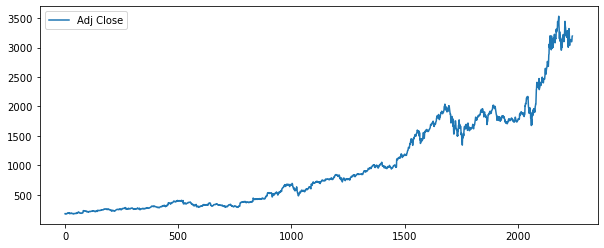

In [7]:
data['Adj Close'].plot(legend=True, figsize=(10,4))

In [8]:
data.columns

Index(['Date', 'Source', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Stock'],
      dtype='object')

In [9]:
len(data.columns)

9

In [10]:
# count the number of numerical and none-numerical variables(columns)
from pandas.api.types import is_numeric_dtype

n=0

for c in data.columns:
    if is_numeric_dtype(data[c]):
        n+=1
        
print('numerical variables: ',n, 'none-numerical variables: ', len(data.columns)-n )

numerical variables:  6 none-numerical variables:  3


In [11]:
#data cleaning to prepare data for analytics

data.isnull()

,Date,Source,Open,High,Low,Close,Adj Close,Volume,Stock
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2237,False,False,False,False,False,False,False,False,False
2238,False,False,False,False,False,False,False,False,False
2239,False,False,False,False,False,False,False,False,False
2240,False,False,False,False,False,False,False,False,False


In [12]:
# Number of missing values in each row
data.isnull().sum()

Date         0
Source       0
Open         1
High         2
Low          0
Close        3
Adj Close    1
Volume       0
Stock        0
dtype: int64

In [13]:
# handling missing data
data.dropna(inplace=True)

In [14]:
data.isnull().sum()

Date         0
Source       0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Stock        0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2235 entries, 0 to 2241
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2235 non-null   object 
 1   Source     2235 non-null   object 
 2   Open       2235 non-null   float64
 3   High       2235 non-null   float64
 4   Low        2235 non-null   float64
 5   Close      2235 non-null   float64
 6   Adj Close  2235 non-null   float64
 7   Volume     2235 non-null   int64  
 8   Stock      2235 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 174.6+ KB


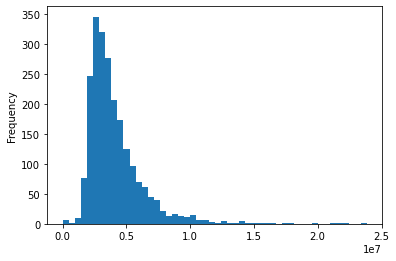

In [16]:
#clean abnormal values
data['Volume'].plot(kind='hist',bins=50)

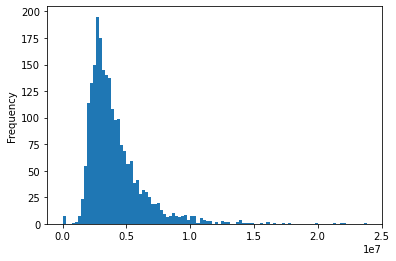

In [17]:
data['Volume'].plot(kind='hist',bins=100)

In [18]:
data['Volume'].min()

0

In [19]:
data['Volume'].max()

23856100

In [20]:
data['Volume'].sort_values(ascending=True).head(20)

29            0
114           1
18            5
161           6
47           23
90           25
66           78
2007     881300
245      984400
1001    1091200
126     1331700
879     1343400
426     1350600
376     1373000
497     1380400
405     1415000
411     1422600
415     1457100
1164    1458800
403     1504500
Name: Volume, dtype: int64

In [21]:
#Remove the volume enterier with exterime low values (values < 100,000) - filter)

data = data[data['Volume']>100000]


In [22]:
data['Volume'].sort_values(ascending=True).head(20)

2007     881300
245      984400
1001    1091200
126     1331700
879     1343400
426     1350600
376     1373000
497     1380400
405     1415000
411     1422600
415     1457100
1164    1458800
403     1504500
749     1513800
1167    1524100
151     1534300
417     1534700
152     1548100
1160    1563300
416     1566400
Name: Volume, dtype: int64

In [23]:
data['Volume'].min()

881300

In [24]:
data['Volume'].max()

23856100

In [25]:
data

,Date,Source,Open,High,Low,Close,Adj Close,Volume,Stock
0,1/3/2012,yahoo,175.889999,179.479996,175.550003,179.029999,179.029999,5110800,amazon
1,1/4/2012,yahoo,179.210007,180.500000,176.070007,177.509995,177.509995,4205200,amazon
2,1/5/2012,yahoo,175.940002,178.250000,174.050003,177.610001,177.610001,3809100,amazon
3,1/6/2012,yahoo,178.070007,184.649994,177.500000,182.610001,182.610001,7008400,amazon
4,1/9/2012,yahoo,182.759995,184.369995,177.000000,178.559998,178.559998,5056900,amazon
...,...,...,...,...,...,...,...,...,...
2237,11/20/2020,yahoo,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374400,amazon
2238,11/23/2020,yahoo,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708900,amazon
2239,11/24/2020,yahoo,3100.500000,3134.250000,3086.260010,3118.060059,3118.060059,3602100,amazon
2240,11/25/2020,yahoo,3141.870117,3198.000000,3140.260010,3185.070068,3185.070068,3790400,amazon


In [26]:
# remove all columns that have a constant/single value
data.head(20)

,Date,Source,Open,High,Low,Close,Adj Close,Volume,Stock
0,1/3/2012,yahoo,175.889999,179.479996,175.550003,179.029999,179.029999,5110800,amazon
1,1/4/2012,yahoo,179.210007,180.500000,176.070007,177.509995,177.509995,4205200,amazon
2,1/5/2012,yahoo,175.940002,178.250000,174.050003,177.610001,177.610001,3809100,amazon
3,1/6/2012,yahoo,178.070007,184.649994,177.500000,182.610001,182.610001,7008400,amazon
4,1/9/2012,yahoo,182.759995,184.369995,177.000000,178.559998,178.559998,5056900,amazon
5,1/10/2012,yahoo,181.100006,182.399994,177.100006,179.339996,179.339996,3985800,amazon
6,1/11/2012,yahoo,179.639999,180.770004,178.190002,178.899994,178.899994,3102700,amazon
7,1/12/2012,yahoo,179.419998,179.490005,175.750000,175.929993,175.929993,5385800,amazon
8,1/13/2012,yahoo,175.809998,178.800003,173.500000,178.419998,178.419998,4753500,amazon
9,1/17/2012,yahoo,180.149994,183.300003,178.509995,181.660004,181.660004,5644500,amazon


In [27]:
constant_columns=[]

for c in data.columns:
    n = len(data[c].unique())
    if n==1:
        constant_columns.append(c)
        
print('Constant Columns: ', constant_columns)

Constant Columns:  ['Source', 'Stock']


In [28]:
data.drop(columns=constant_columns,axis=1,inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/2012,175.889999,179.479996,175.550003,179.029999,179.029999,5110800
1,1/4/2012,179.210007,180.500000,176.070007,177.509995,177.509995,4205200
2,1/5/2012,175.940002,178.250000,174.050003,177.610001,177.610001,3809100
3,1/6/2012,178.070007,184.649994,177.500000,182.610001,182.610001,7008400
4,1/9/2012,182.759995,184.369995,177.000000,178.559998,178.559998,5056900
...,...,...,...,...,...,...,...
2237,11/20/2020,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374400
2238,11/23/2020,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708900
2239,11/24/2020,3100.500000,3134.250000,3086.260010,3118.060059,3118.060059,3602100
2240,11/25/2020,3141.870117,3198.000000,3140.260010,3185.070068,3185.070068,3790400


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2228 entries, 0 to 2241
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2228 non-null   object 
 1   Open       2228 non-null   float64
 2   High       2228 non-null   float64
 3   Low        2228 non-null   float64
 4   Close      2228 non-null   float64
 5   Adj Close  2228 non-null   float64
 6   Volume     2228 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 139.2+ KB


In [30]:
dateObject = pd.DatetimeIndex(data['Date'])

In [31]:
dateObject

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2020-11-13', '2020-11-16', '2020-11-17', '2020-11-18',
               '2020-11-19', '2020-11-20', '2020-11-23', '2020-11-24',
               '2020-11-25', '2020-11-27'],
              dtype='datetime64[ns]', name='Date', length=2228, freq=None)

In [32]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/2012,175.889999,179.479996,175.550003,179.029999,179.029999,5110800
1,1/4/2012,179.210007,180.500000,176.070007,177.509995,177.509995,4205200
2,1/5/2012,175.940002,178.250000,174.050003,177.610001,177.610001,3809100
3,1/6/2012,178.070007,184.649994,177.500000,182.610001,182.610001,7008400
4,1/9/2012,182.759995,184.369995,177.000000,178.559998,178.559998,5056900
...,...,...,...,...,...,...,...
2237,11/20/2020,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374400
2238,11/23/2020,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708900
2239,11/24/2020,3100.500000,3134.250000,3086.260010,3118.060059,3118.060059,3602100
2240,11/25/2020,3141.870117,3198.000000,3140.260010,3185.070068,3185.070068,3790400


In [33]:
data['Year']=dateObject.year
data['Month']=dateObject.month
data['Day']=dateObject.day
data

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,1/3/2012,175.889999,179.479996,175.550003,179.029999,179.029999,5110800,2012,1,3
1,1/4/2012,179.210007,180.500000,176.070007,177.509995,177.509995,4205200,2012,1,4
2,1/5/2012,175.940002,178.250000,174.050003,177.610001,177.610001,3809100,2012,1,5
3,1/6/2012,178.070007,184.649994,177.500000,182.610001,182.610001,7008400,2012,1,6
4,1/9/2012,182.759995,184.369995,177.000000,178.559998,178.559998,5056900,2012,1,9
...,...,...,...,...,...,...,...,...,...,...
2237,11/20/2020,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374400,2020,11,20
2238,11/23/2020,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708900,2020,11,23
2239,11/24/2020,3100.500000,3134.250000,3086.260010,3118.060059,3118.060059,3602100,2020,11,24
2240,11/25/2020,3141.870117,3198.000000,3140.260010,3185.070068,3185.070068,3790400,2020,11,25


In [34]:
data[['Date','Year','Month','Day']]

,Date,Year,Month,Day
0,1/3/2012,2012,1,3
1,1/4/2012,2012,1,4
2,1/5/2012,2012,1,5
3,1/6/2012,2012,1,6
4,1/9/2012,2012,1,9
...,...,...,...,...
2237,11/20/2020,2020,11,20
2238,11/23/2020,2020,11,23
2239,11/24/2020,2020,11,24
2240,11/25/2020,2020,11,25


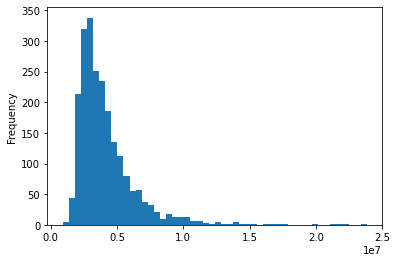

In [35]:
data['Volume'].plot(kind='hist',bins=50)

In [36]:
data[['Volume']] = data[['Volume']] / 1000
data['Volume']

0       5110.8
1       4205.2
2       3809.1
3       7008.4
4       5056.9
         ...  
2237    3374.4
2238    4708.9
2239    3602.1
2240    3790.4
2241    2392.9
Name: Volume, Length: 2228, dtype: float64

In [37]:
data[['Year','Volume']].groupby('Year').sum()

,Volume
Year,
2012,975492.4
2013,747905.7
2014,1029066.7
2015,957102.0
2016,1038756.3
2017,882705.4
2018,1417897.6
2019,974729.4
2020,1166035.7


Text(0, 0.5, 'Stocks Volume')

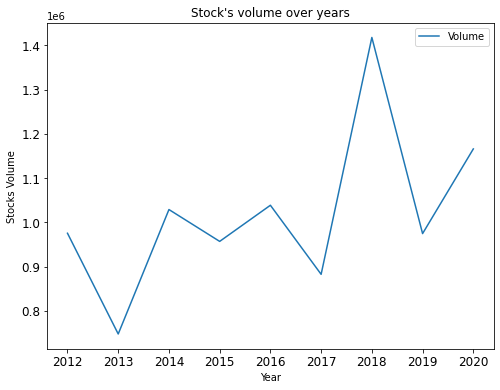

In [38]:
data[['Year','Volume']].groupby('Year').sum().plot(figsize=(8,6),y='Volume',
                                                   fontsize=12,title="Stock's volume over years")
plt.ylabel('Stocks Volume')

Text(0, 0.5, 'Stocks Volume')

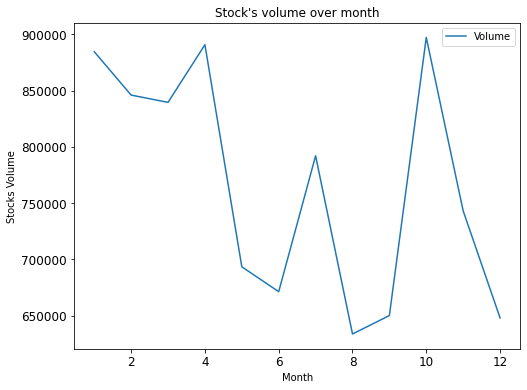

In [39]:
data[['Month','Volume']].groupby('Month').sum().plot(figsize=(8,6),y='Volume',
                                                   fontsize=12,title="Stock's volume over month")
plt.ylabel('Stocks Volume')

Text(0, 0.5, 'Stocks Volume')

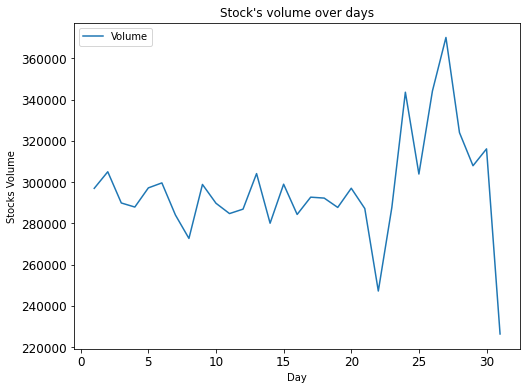

In [40]:
data[['Day','Volume']].groupby('Day').sum().plot(figsize=(8,6),y='Volume',
                                                   fontsize=12,title="Stock's volume over days")
plt.ylabel('Stocks Volume')

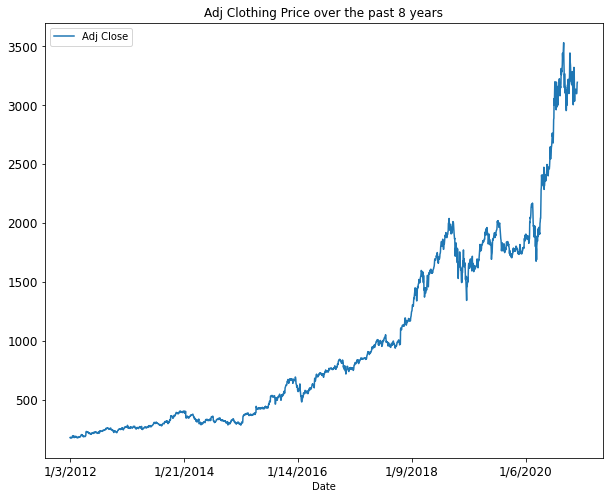

In [41]:
data[['Date','Adj Close']].plot(figsize=(10,8),x='Date',y='Adj Close',
                               fontsize=12,title="Adj Clothing Price over the past 8 years")

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2228 entries, 0 to 2241
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2228 non-null   object 
 1   Open       2228 non-null   float64
 2   High       2228 non-null   float64
 3   Low        2228 non-null   float64
 4   Close      2228 non-null   float64
 5   Adj Close  2228 non-null   float64
 6   Volume     2228 non-null   float64
 7   Year       2228 non-null   int64  
 8   Month      2228 non-null   int64  
 9   Day        2228 non-null   int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 191.5+ KB


In [43]:
data['Date'] = pd.to_datetime(data['Date'],format='%m/%d/%Y')

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2228 entries, 0 to 2241
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2228 non-null   datetime64[ns]
 1   Open       2228 non-null   float64       
 2   High       2228 non-null   float64       
 3   Low        2228 non-null   float64       
 4   Close      2228 non-null   float64       
 5   Adj Close  2228 non-null   float64       
 6   Volume     2228 non-null   float64       
 7   Year       2228 non-null   int64         
 8   Month      2228 non-null   int64         
 9   Day        2228 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(3)
memory usage: 191.5 KB


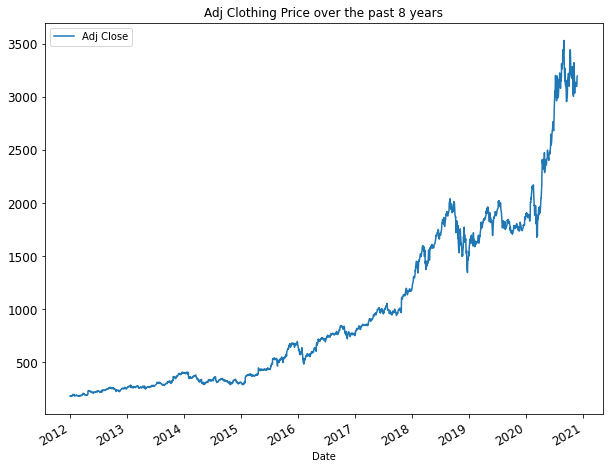

In [45]:
data[['Date','Adj Close']].plot(figsize=(10,8),x='Date',y='Adj Close',
                               fontsize=12,title="Adj Clothing Price over the past 8 years")

Text(0, 0.5, 'Sum of the Adj Close')

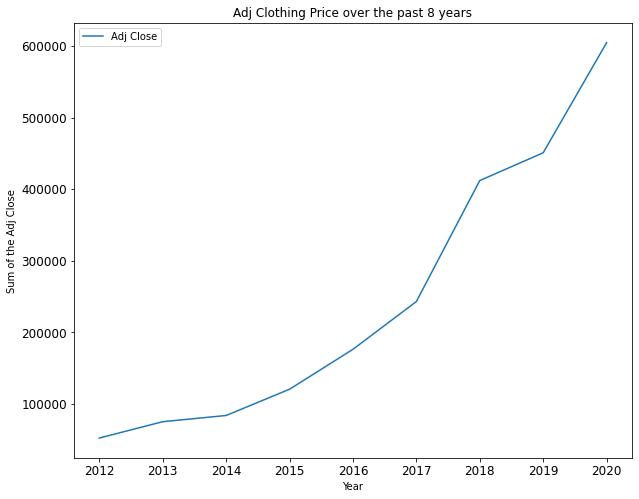

In [46]:
data[['Year','Adj Close']].groupby('Year').sum().plot(figsize=(10,8),y='Adj Close',
                               fontsize=12,title="Adj Clothing Price over the past 8 years")

plt.ylabel('Sum of the Adj Close')

Text(0, 0.5, 'Sum of the Adj Close')

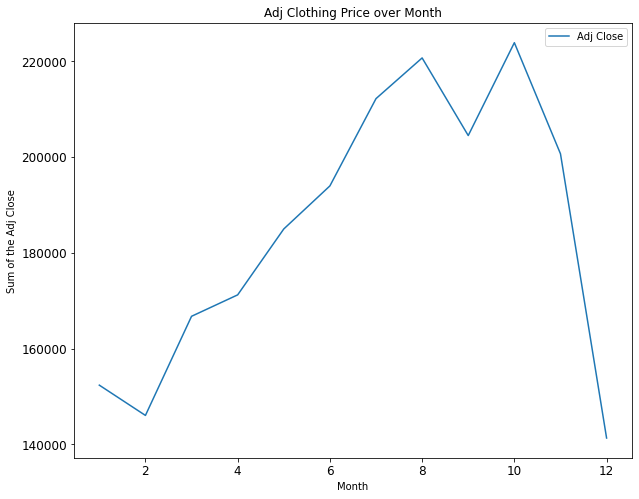

In [47]:
data[['Month','Adj Close']].groupby('Month').sum().plot(figsize=(10,8),y='Adj Close',
                               fontsize=12,title="Adj Clothing Price over Month")

plt.ylabel('Sum of the Adj Close')

Text(0, 0.5, 'Sum of the Adj Close')

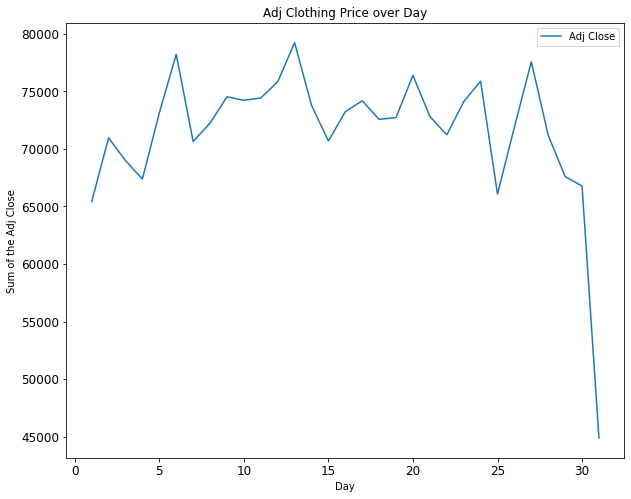

In [48]:
data[['Day','Adj Close']].groupby('Day').sum().plot(figsize=(10,8),y='Adj Close',
                               fontsize=12,title="Adj Clothing Price over Day")

plt.ylabel('Sum of the Adj Close')

Text(0, 0.5, 'Sum of the Adj Close')

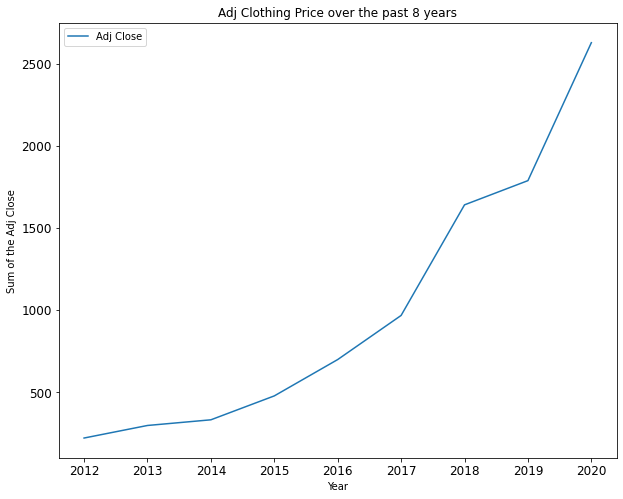

In [49]:
data[['Year','Adj Close']].groupby('Year').mean().plot(figsize=(10,8),y='Adj Close',
                               fontsize=12,title="Adj Clothing Price over the past 8 years")

plt.ylabel('Sum of the Adj Close')

Text(0, 0.5, 'Sum of the Adj Close')

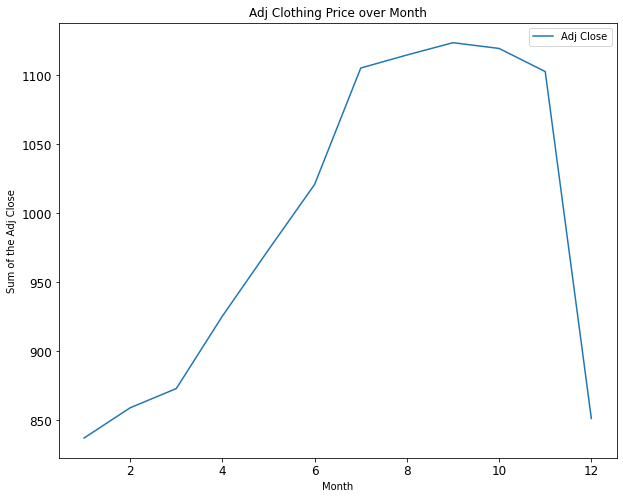

In [50]:
data[['Month','Adj Close']].groupby('Month').mean().plot(figsize=(10,8),y='Adj Close',
                               fontsize=12,title="Adj Clothing Price over Month")

plt.ylabel('Sum of the Adj Close')

Text(0, 0.5, 'Sum of the Adj Close')

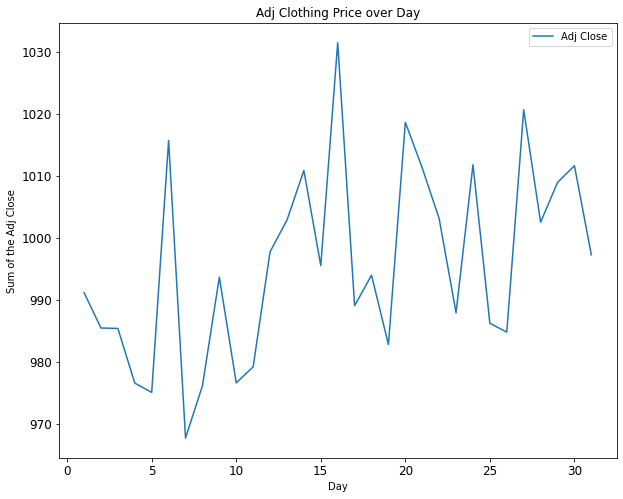

In [51]:
data[['Day','Adj Close']].groupby('Day').mean().plot(figsize=(10,8),y='Adj Close',
                               fontsize=12,title="Adj Clothing Price over Day")

plt.ylabel('Sum of the Adj Close')

In [52]:
#plot the Adj Close prices that are smaller than the open prices after 2015
filter1=data[data['Year']>2015]
len(filter1)

1236

In [53]:
filter2 = data[data['Adj Close'] < data['Open']]
len(filter2)

1105

In [54]:
filter1['Year']

1006    2016
1007    2016
1008    2016
1009    2016
1010    2016
        ... 
2237    2020
2238    2020
2239    2020
2240    2020
2241    2020
Name: Year, Length: 1236, dtype: int64

In [55]:
filter2[['Adj Close','Open']]

,Adj Close,Open
1,177.509995,179.210007
4,178.559998,182.759995
5,179.339996,181.100006
6,178.899994,179.639999
7,175.929993,179.419998
...,...,...
2234,3135.659912,3183.540039
2235,3105.459961,3134.000000
2237,3099.399902,3117.020020
2238,3098.389893,3116.699951


In [56]:
filter1=data['Year']>2015
filter1

0       False
1       False
2       False
3       False
4       False
        ...  
2237     True
2238     True
2239     True
2240     True
2241     True
Name: Year, Length: 2228, dtype: bool

In [57]:
filter2=data['Adj Close'] < data['Open']
filter2

0       False
1        True
2       False
3       False
4        True
        ...  
2237     True
2238     True
2239    False
2240    False
2241     True
Length: 2228, dtype: bool

In [58]:
result = data[filter1 & filter2]
result

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
1006,2016-01-04,656.289978,657.719971,627.510010,636.989990,636.989990,9314.5,2016,1,4
1007,2016-01-05,646.859985,646.909973,627.650024,633.789978,633.789978,5822.6,2016,1,5
1009,2016-01-07,621.799988,630.000000,605.210022,607.940002,607.940002,7074.9,2016,1,7
1010,2016-01-08,619.659973,624.140015,606.000000,607.049988,607.049988,5512.9,2016,1,8
1012,2016-01-12,625.250000,625.989990,612.239990,617.890015,617.890015,4724.1,2016,1,12
...,...,...,...,...,...,...,...,...,...,...
2234,2020-11-17,3183.540039,3189.250000,3135.260010,3135.659912,3135.659912,3444.7,2020,11,17
2235,2020-11-18,3134.000000,3140.000000,3105.100098,3105.459961,3105.459961,2916.8,2020,11,18
2237,2020-11-20,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374.4,2020,11,20
2238,2020-11-23,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708.9,2020,11,23


In [59]:
result['Open'].sum()-result['Adj Close'].sum()

11206.19128899998

In [60]:
result['Open'].mean()-result['Adj Close'].mean()

18.191868975649413

In [61]:
result[['Year','Adj Close']].groupby('Year').count()

,Adj Close
Year,
2016,127
2017,128
2018,124
2019,125
2020,112


In [62]:
result[['Year','Adj Close']].groupby('Year').sum()

,Adj Close
Year,
2016,88700.740235
2017,124082.879700
2018,204003.290281
2019,223714.578973
2020,295435.149416


In [63]:
result[['Year','Adj Close']].groupby('Year').mean()

,Adj Close
Year,
2016,698.431025
2017,969.397498
2018,1645.187825
2019,1789.716632
2020,2637.813834


In [64]:
result[['Month','Adj Close']].groupby('Month').mean()

,Adj Close
Month,
1,1245.415793
2,1311.449165
3,1280.528542
4,1410.756224
5,1546.669076
6,1474.765956
7,1803.203599
8,1694.652779
9,1751.323269


Text(0, 0.5, 'Mean of Adj Close')

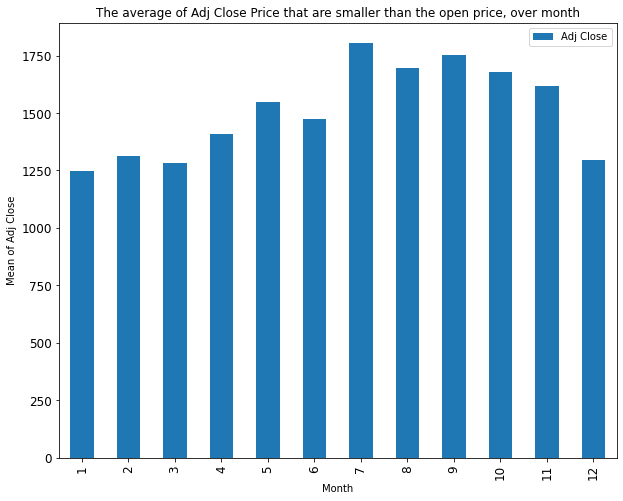

In [66]:
result[['Month','Adj Close']].groupby('Month').mean().plot.bar(figsize=(10,8),
                                                              y='Adj Close',fontsize=12,legend=True,
                                                              title="The average of Adj Close Price that are smaller than the open price, over month")
plt.ylabel('Mean of Adj Close')

In [67]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2012-01-03,175.889999,179.479996,175.550003,179.029999,179.029999,5110.8,2012,1,3
1,2012-01-04,179.210007,180.500000,176.070007,177.509995,177.509995,4205.2,2012,1,4
2,2012-01-05,175.940002,178.250000,174.050003,177.610001,177.610001,3809.1,2012,1,5
3,2012-01-06,178.070007,184.649994,177.500000,182.610001,182.610001,7008.4,2012,1,6
4,2012-01-09,182.759995,184.369995,177.000000,178.559998,178.559998,5056.9,2012,1,9
...,...,...,...,...,...,...,...,...,...,...
2237,2020-11-20,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374.4,2020,11,20
2238,2020-11-23,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708.9,2020,11,23
2239,2020-11-24,3100.500000,3134.250000,3086.260010,3118.060059,3118.060059,3602.1,2020,11,24
2240,2020-11-25,3141.870117,3198.000000,3140.260010,3185.070068,3185.070068,3790.4,2020,11,25


In [68]:
data.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2012-01-03,175.889999,179.479996,175.550003,179.029999,179.029999,5110.8,2012,1,3
1,2012-01-04,179.210007,180.500000,176.070007,177.509995,177.509995,4205.2,2012,1,4
2,2012-01-05,175.940002,178.250000,174.050003,177.610001,177.610001,3809.1,2012,1,5
3,2012-01-06,178.070007,184.649994,177.500000,182.610001,182.610001,7008.4,2012,1,6
4,2012-01-09,182.759995,184.369995,177.000000,178.559998,178.559998,5056.9,2012,1,9
5,2012-01-10,181.100006,182.399994,177.100006,179.339996,179.339996,3985.8,2012,1,10
6,2012-01-11,179.639999,180.770004,178.190002,178.899994,178.899994,3102.7,2012,1,11
7,2012-01-12,179.419998,179.490005,175.750000,175.929993,175.929993,5385.8,2012,1,12
8,2012-01-13,175.809998,178.800003,173.500000,178.419998,178.419998,4753.5,2012,1,13
9,2012-01-17,180.149994,183.300003,178.509995,181.660004,181.660004,5644.5,2012,1,17


In [70]:
ds = data[['Month','High','Low','Adj Close']].groupby('Month').mean()
ds

,High,Low,Adj Close
Month,,,
1,845.138624,826.699177,837.217747
2,869.500417,848.818237,859.137411
3,883.179059,860.221100,873.045287
4,935.481024,913.718432,925.537783
5,981.422476,964.186472,973.608949
6,1030.305523,1010.421686,1020.935264
7,1117.510261,1090.640261,1105.226407
8,1124.288736,1103.972829,1114.643383
9,1137.103572,1110.570271,1123.582474


Text(0, 0.5, 'average stock values')

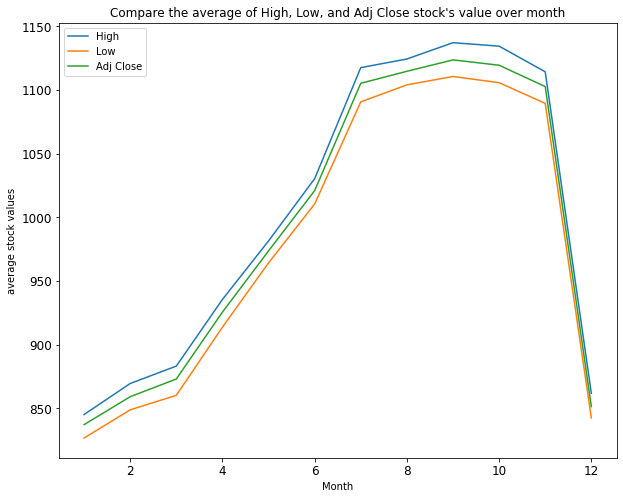

In [71]:
ds.plot(figsize=(10,8),y=['High','Low','Adj Close'],
                               fontsize=12,
        title="Compare the average of High, Low, and Adj Close stock's value over month")

plt.ylabel("average stock values")

Text(0, 0.5, 'average stock values')

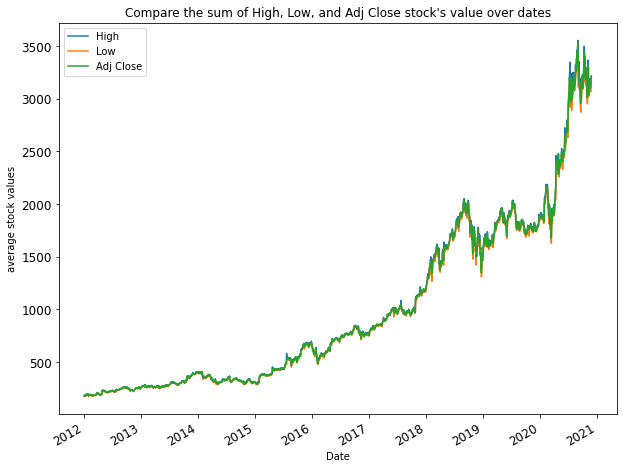

In [72]:
data[['Date','High','Low','Adj Close']].groupby('Date').sum().plot(figsize=(10,8),y=['High','Low','Adj Close'],
                               fontsize=12,
        title="Compare the sum of High, Low, and Adj Close stock's value over dates")

plt.ylabel("average stock values")

In [73]:
# Query the data to answer some questions
# Find the month that have the highest and lowest number of stock values
r = data[['Month','Volume']].groupby('Month').sum()
r

,Volume
Month,
1,884620.5
2,846030.2
3,839584.5
4,890804.0
5,693382.7
6,671267.7
7,792035.2
8,633655.4
9,650017.7


In [74]:
r.idxmin()

Volume    8
dtype: int64

In [75]:
r.idxmax()

Volume    10
dtype: int64

In [76]:
r.min()

Volume    633655.4
dtype: float64

In [77]:
r.max()

Volume    897270.2
dtype: float64

In [79]:
r.idxmin()[0] #just the index

8

In [81]:
r.min()[0]  #value only

633655.3999999996

In [87]:
print('The month with the lowest volume', r.idxmin()[0], ' Volume ', (r.min()[0]*1000).astype('int'))

The month with the lowest volume 8  Volume  633655399


In [88]:
print('The month with the highes volume', r.idxmax()[0], ' Volume ', (r.max()[0]*1000).astype('int'))

The month with the highes volume 10  Volume  897270199


In [89]:
# Find the dates that have the highest and lowest number of volumes
data

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2012-01-03,175.889999,179.479996,175.550003,179.029999,179.029999,5110.8,2012,1,3
1,2012-01-04,179.210007,180.500000,176.070007,177.509995,177.509995,4205.2,2012,1,4
2,2012-01-05,175.940002,178.250000,174.050003,177.610001,177.610001,3809.1,2012,1,5
3,2012-01-06,178.070007,184.649994,177.500000,182.610001,182.610001,7008.4,2012,1,6
4,2012-01-09,182.759995,184.369995,177.000000,178.559998,178.559998,5056.9,2012,1,9
...,...,...,...,...,...,...,...,...,...,...
2237,2020-11-20,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374.4,2020,11,20
2238,2020-11-23,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708.9,2020,11,23
2239,2020-11-24,3100.500000,3134.250000,3086.260010,3118.060059,3118.060059,3602.1,2020,11,24
2240,2020-11-25,3141.870117,3198.000000,3140.260010,3185.070068,3185.070068,3790.4,2020,11,25


In [91]:
r = data['Volume']
r

0       5110.8
1       4205.2
2       3809.1
3       7008.4
4       5056.9
         ...  
2237    3374.4
2238    4708.9
2239    3602.1
2240    3790.4
2241    2392.9
Name: Volume, Length: 2228, dtype: float64

In [93]:
s=r.idxmin()
l=r.idxmax()
print('The row with the lowest volume is', s)
print('The row with the highest volume is', l)

The row with the lowest volume is 2007
The row with the highest volume is 773


In [96]:
print('The date with the lowest volume ', data.iloc[s]['Date'],' volume: ',data.iloc[s]['Volume'])

The date with the lowest volume  2020-01-15 00:00:00  volume:  2896.6


In [97]:
print('The date with the highest volume ', data.iloc[l]['Date'],' volume: ',data.iloc[l]['Volume'])

The date with the highest volume  2015-02-20 00:00:00  volume:  3258.0


In [98]:
print('The date with the lowest volume ', data.iloc[s]['Date'].date(),' volume: ',data.iloc[s]['Volume'])
print('The date with the highest volume ', data.iloc[l]['Date'].date(),' volume: ',data.iloc[l]['Volume'])

The date with the lowest volume  2020-01-15  volume:  2896.6
The date with the highest volume  2015-02-20  volume:  3258.0


In [102]:
# Find the month and day that has the lowest closing average price
r = data[['Month','Day','Adj Close']].groupby(['Month','Day']).mean()
r.head(40)

Adj Close
Month Day             
1     2     931.658335
      3     881.009992
      4     769.301659
      5     624.636002
      6     700.508339
      7     851.536667
      8     910.175703
      9     844.117504
      10    918.849997
      11    796.806687
      12    640.813996
      13    692.398344
      14    840.531652
      15    843.580012
      16    970.341654
      17    930.629988
      18    851.711975
      19    718.137478
      20    465.117508
      21    792.830002
      22    918.338584
      23    858.935001
      24   1059.596680
      25    825.559990
      26    669.086017
      27    689.309993
      28    850.144999
      29    916.127154
      30    977.087154
      31    974.349993
2     1     811.308327
      2     673.637988
      3     811.033990
      4     865.320002
      5     939.720014
      6     889.399996
      7     961.204293
      8     782.326668
      9     639.713992
      10    728.543322

In [103]:
r.idxmin()[0]

(2, 29)

In [104]:
r.min()[0]

366.105011

In [106]:
print('The month and day with the lowest closing price is', r.idxmin()[0],
     'The average Adj Close price is', r.min()[0])

The month and day with the lowest closing price is (2, 29) The average Adj Close price is 366.105011


In [114]:
# show the closing, open, year, month, day, of the highest adj close
r = data.loc[data['Adj Close'].idxmax()]
r

Date         2020-09-02 00:00:00
Open                        3547
High                     3552.25
Low                      3486.69
Close                    3531.45
Adj Close                3531.45
Volume                    3931.5
Year                        2020
Month                          9
Day                            2
Name: 2181, dtype: object

In [110]:
print('closing ',r['Close'], ' Open ',r['Open'], 
      ' Year ',r['Year'], ' Month ',r['Month'], 
      ' Day ',r['Day'], ' Volume ',r['Volume'])

closing  3531.4499509999996  Open  3547.0  Year  2020  Month  9  Day  2  Volume  3931.5


In [111]:
r

Date         2020-09-02 00:00:00
Open                        3547
High                     3552.25
Low                      3486.69
Close                    3531.45
Adj Close                3531.45
Volume                    3931.5
Year                        2020
Month                          9
Day                            2
Name: 2181, dtype: object

In [113]:
type(r)

pandas.core.series.Series